### Novelties since last version

The last version relies on an excel input, which needed a lot of cleaning. This version relies on a cleaner datafile made by Christoph, which requires less preprocessing.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re
from copy import deepcopy

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Load data

In [2]:
data_path = '../data/raw/'
in_file = '20240425_dataset_cleaned.csv'
df=pd.read_csv(data_path+in_file)



Check that there are no repeated articles

In [3]:
if df.article.duplicated().any():
    duplicate_idx=df.article.duplicated().index
    print("The following articles seem duplicate",df.article[duplicate_idx])
    raise RuntimeError("There are duplicate entries in the dataset. Instead of going on, please check your dataset")
else:
    print('There are no evident duplicates')

There are no evident duplicates


In [4]:
#Manual check, in case two duplicates of an article are written in similar way
# df.article.sort_values()


In [5]:
'''
The different datasets are not written as lists. We change this: at the end of this cell, 
each article is assigned a list of datasets that were used for that article
'''   

for i in range(len(df)):
    if isinstance(df.dataset[i], str):    
        raw_entry = [df.dataset[i]]
        new_entry = re.split('; |, |;', raw_entry[0])
        df.at[i, 'dataset'] = new_entry.copy()


Manually replace entries that correspond to the same dataset, but have a slightly different wording


In [72]:
# the following function is commented because it is bugged

# def replace_strings(data_series, strings=None):
#     '''
#     data_series is the data series from which we wish to replace
#     strings is a list, in which each entry is 2-element list: 
#             - the first element is the string to replace, 
#             - the second is what we replace with
#     '''
    
#     dummy_series = data_series.copy(deep=True)
    
#     if strings==None:
#         print('No strings to replace were provided')
#         return

#     if isinstance(data_series[0],str):
#         raise NotImplementedError
        
#     if isinstance(data_series[0],list):
#         for elems in data_series: # iterate through each line in the data series
# #             print('elems = ',elems)
#             for ielem, individual_elem in enumerate(elems): # each line may have several elements
# #                 print('individual_elem: ',individual_elem)
#                 temp=individual_elem.replace(strings[0][0],strings[0][1])
#                 for irep in range(1,len(strings)): # iterate through all the possible changes to the strings
#                     temp=temp.replace(strings[irep][0],strings[irep][1])
# #                 print('temp :',temp)                    
#                 dummy_series.at[ielem]=temp
    
# #     print(dummy_series)
#     flattened_dataset = sum(dummy_series,[])
#     unique_datasets = np.unique(flattened_dataset)
#     print("Datasets in our database: ",unique_datasets)

#     data_series=deepcopy(dummy_series)
        
# rep_strings=[['Japanese Ministry of Environment (2018)','Japanese Ministry of Environment'],
#              ['Japanese Ministry of the Environment','Japanese Ministry of Environment'],
#              ['Wu et al. 2016','Wu et al. (2016)'],
#              ['Khan et al. (2019a)','Khan et al. (2019)'],
#              ['Khan et al. 2019','Khan et al. (2019)'],
#              ['Khan et al. 2019a','Khan et al. (2019)'],
#              ['Khan et al. 2019b','Khan et al. (2019)'],
#              ['Khan et al. (2019)a','Khan et al. (2019)'],
#              ['Khan et al. (2019)b','Khan et al. (2019)'],
#              ['not reported','unclear/not reported'],
#              ['other unclear','unclear/not reported'],
#              ['ECHA database','ECHA'],
#              ['ECHA’s risk assessment report','ECHA'],
#              ['Pesticide Properties Database (PPDB)','PPDB'],
#              ['Pesticides Properties Database (PPDB)','PPDB'],
#              ['ECOTOX Database','ECOTOX'],
#              ['data provided by Solvay','Solvay'],
#             ]
# replace_strings(df.dataset,rep_strings)

    




In [6]:
for ds in df.dataset:
    for iis,individual_source in enumerate(ds):
        temp=individual_source.replace('Wu et al. 2016','Wu et al. (2016)')
        temp=temp.replace('Japanese Ministry of Environment (2018)','Japanese Ministry of Environment')
        temp=temp.replace('Japanese Ministry of the Environment','Japanese Ministry of Environment')
        temp=temp.replace('Khan et al. (2019a)','Khan et al. (2019)')
        temp=temp.replace('Khan et al. 2019','Khan et al. (2019)')
        temp=temp.replace('Khan et al. 2019a','Khan et al. (2019)')
        temp=temp.replace('Khan et al. 2019b','Khan et al. (2019)')
        temp=temp.replace('Khan et al. (2019)a','Khan et al. (2019)')
        temp=temp.replace('Khan et al. (2019)b','Khan et al. (2019)')
        temp=temp.replace('not reported','unclear/not reported')
        temp=temp.replace('other unclear','unclear/not reported')
        temp=temp.replace('AMBIT Database Database','AMBIT')
        temp=temp.replace('ECHA database','ECHA')
        temp=temp.replace('ECHA’s risk assessment report','ECHA')
        temp=temp.replace('Pesticide Properties Database (PPDB)','PPDB')
        temp=temp.replace('Pesticides Properties Database (PPDB)','PPDB')
        temp=temp.replace('ECOTOX Database','ECOTOX')
        temp=temp.replace('European Food Safety Authority (EFSA) Database','EFSA')
        temp=temp.replace('data provided by Solvay','Solvay')
        ds[iis]=temp
    # print(list(set(ds)))

# Now that we changed the names, we make sure that no dataset is contained more than once in each article
for row in df.index:
    # ds=list(set(ds))
    df.at[row,'dataset']=list(set(df.dataset.iloc[row]))


##### Problem

Note that nested datasets are currently not considered. For example, the Kahn 2019 dataset takes AMBIT database among others. Consequences:

- Studies listed as taking the data from Kahn 2019 are considered as taking different data from Kahn itself

- There is also another study using AMBIT. It could again be that they are the same data, but again they are listed as different. 

In [7]:
# # Create a list of all the used datasets

flattened_dataset = sum(df.dataset.values,[])
unique_datasets = np.unique(flattened_dataset)
print("Datasets in our database: ",unique_datasets)

# tf=['Khan et al. (2019)'==elem for i,elem in enumerate(flattened_dataset)]

# for value in df.dataset.values:
#     for i in value:
#         if (i=='Khan et al. (2019)'):
#             print(value)

# # ['Khan et al. (2019)' in df.dataset.values[i] for i in range(len(df))]


Datasets in our database:  ['AMBIT' 'Aquire' 'Aranda et al. (2017)' 'Austin et al. (2015)'
 'Benfenati (2011)' 'Canadian Domestic Substances list'
 'Cassani et al. (2013)' 'Cassotti et al. (2015)' 'Cheng et al. (2012)'
 'Devillers (2001)' 'EAT5' 'ECETOC' 'ECHA' 'ECOSAR' 'ECOTOX' 'EFSA'
 'EPA fathead minnow acute toxicity database (EPAFHM)' 'ESIS'
 'Eldred et al. (1999)' 'EnviChem' 'EnviroTox' 'Environment (2014)'
 'Fathead minnow database' 'Furuhama et al. 2016' 'HSDB'
 'Hommel compendium' 'INERIS' 'Japanese Ministry of Environment'
 'Japanese National Institute of Technology and Evaluation (NITE)'
 'Jia et al. (2020)' 'Khan et al. (2019)' 'Li et al. (2017)'
 'Lyakurwa et al. (2014)' 'Maran et al. (2007)' 'Martin and Young (2001)'
 'Mid-Continent Ecology Division of US EPA ‘National Health and Environmental Effect Research Laboratory'
 'OASIS' 'OECD QSAR Toolbox'
 'Office of Pesticide Programs (OPP) Pesticides Ecotoxicity Database'
 'PBT database' 'PPDB' 'PPDB (2015)' 'Papa et al. (200

# Basic stats

In [8]:
# Columns that identify the article
id_cols = ['entry_id', 'article', 'article_short']

## Datasets

In [9]:
dataset_cols = ['dataset', 'version',
       'dataset_chemical_space', 'dataset_tax_space', 'dataset_expspace']


### Dataset sources
How many times each dataset is used

In [10]:
# Create histogram of the datasets
histo_datasets = np.ndarray(len(unique_datasets))

for ids,ds in enumerate(unique_datasets):
    # print(ds)
    histo_datasets[ids]=flattened_dataset.count(ds)

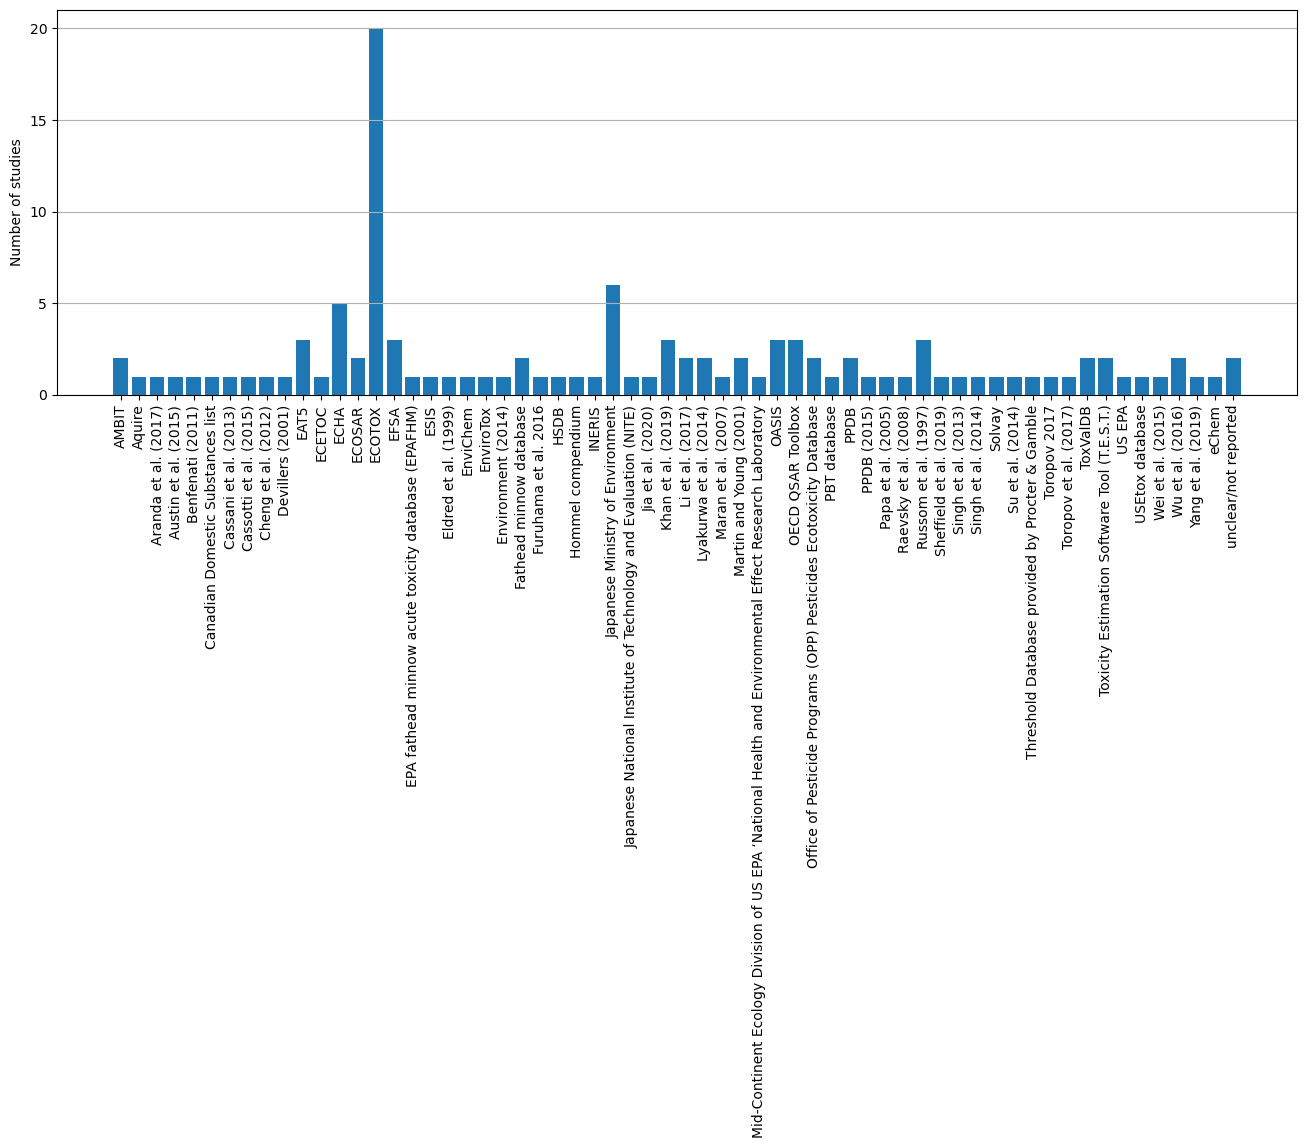

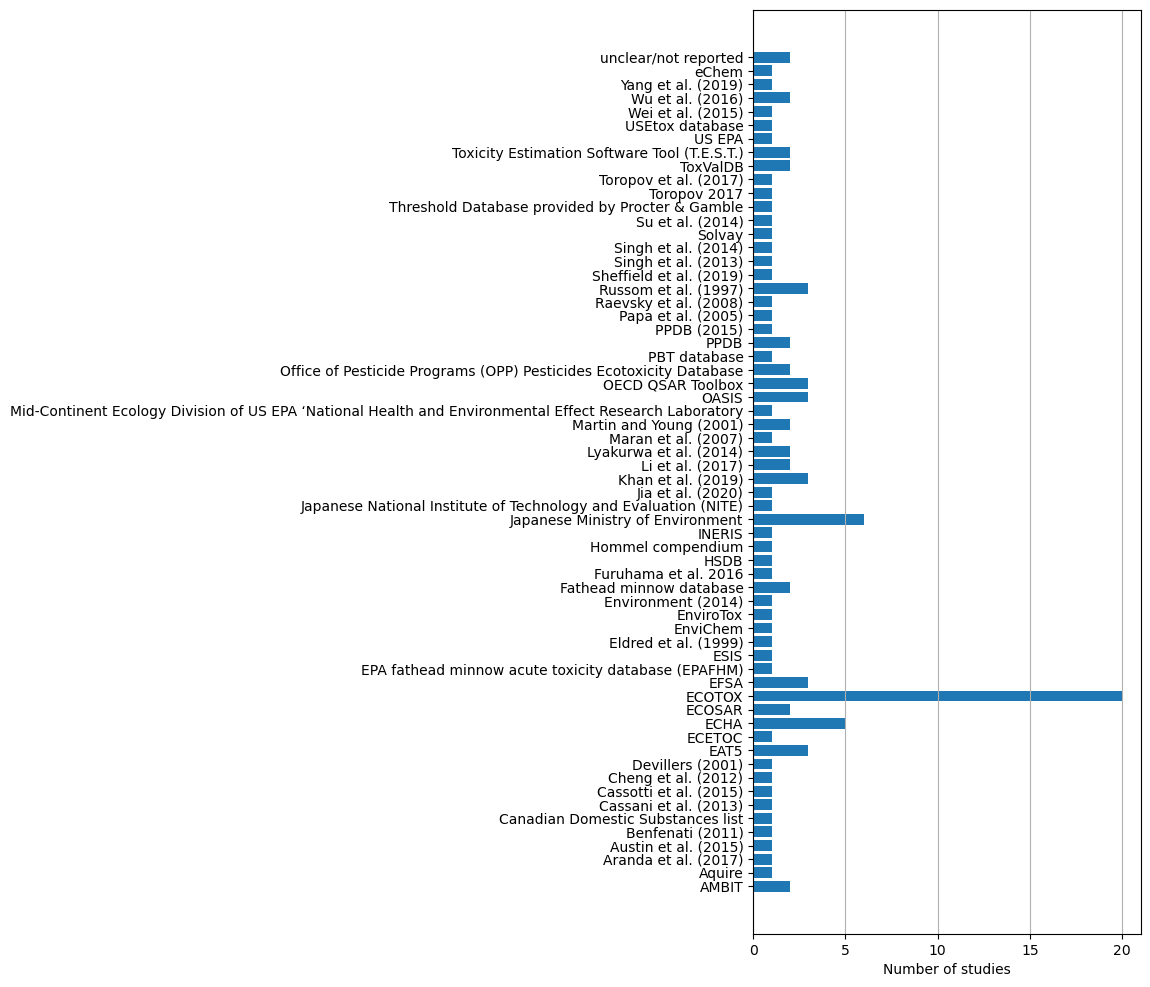

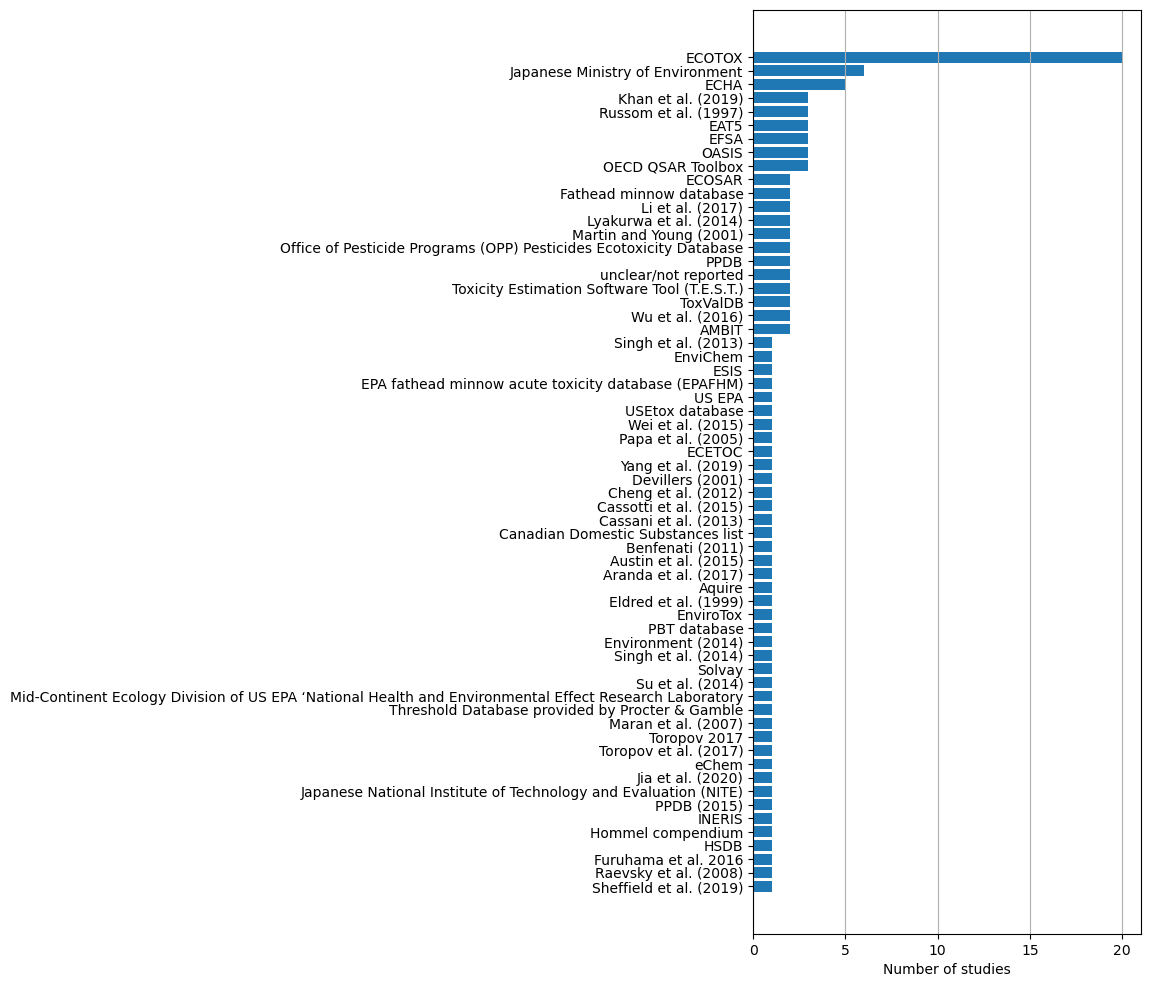

In [11]:
fig, ax = plt.subplots(figsize=(16,5), nrows=1, ncols=1)

# Histogram of the datasets
ax.bar(unique_datasets,histo_datasets)
plt.xticks(rotation=90)
plt.yticks(np.arange(0,21,5))
plt.ylabel('Number of studies')
plt.grid(axis='y')
plt.show()


# Same figure, with horizontal bars
fig, ax = plt.subplots(figsize=(5,12), nrows=1, ncols=1)
ax.barh(unique_datasets,histo_datasets)
plt.xticks(np.arange(0,21,5))
plt.grid(axis='x')
plt.xlabel('Number of studies')
plt.show()


# Same figure, sorted by occurrence
fig, ax = plt.subplots(figsize=(5,12), nrows=1, ncols=1)
sorted_indices=np.argsort(histo_datasets)
ax.barh(unique_datasets[sorted_indices],histo_datasets[sorted_indices])
plt.xticks(np.arange(0,21,5))
plt.grid(axis='x')
plt.xlabel('Number of studies')
plt.show()

### Dataset Version


Count number of times that the dataset version was reported

In [12]:
df.version.value_counts()

not reported                   28
single paper                    4
accessed 17.5.2023              1
accessed 14.06.2023             1
march 2014                      1
accessed 06.11.2020             1
Version 4.2 of the software     1
44819                           1
44656                           1
Name: version, dtype: int64

In [13]:
def plot_version_reported(my_df):

    # Take the non reported ones, and count all the rest as reported
    label_nonreported = my_df.version.value_counts().index[0]
    number_nonreported = my_df.version.value_counts().iloc[0]+my_df.version.isnull().sum()
    
    label_reported = 'reported'
    number_reported = len(my_df.version)-number_nonreported

    fig, ax = plt.subplots(figsize=(3,2), nrows=1, ncols=1)

    labels=[label_nonreported,label_reported]
    bars=[number_nonreported,number_reported]
    
    ax.bar(labels,bars)
    # plt.xticks(rotation=90)
    # plt.yticks(range(21))
    plt.ylabel('Number of studies')
    plt.grid(axis='y')
    plt.title('Dataset version')
    plt.show()



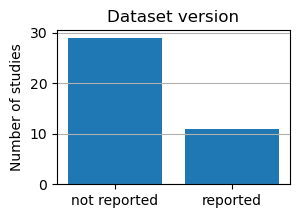

In [14]:
plot_version_reported(df)

### Plot chemical space

This needs to be coarsened in bigger categories

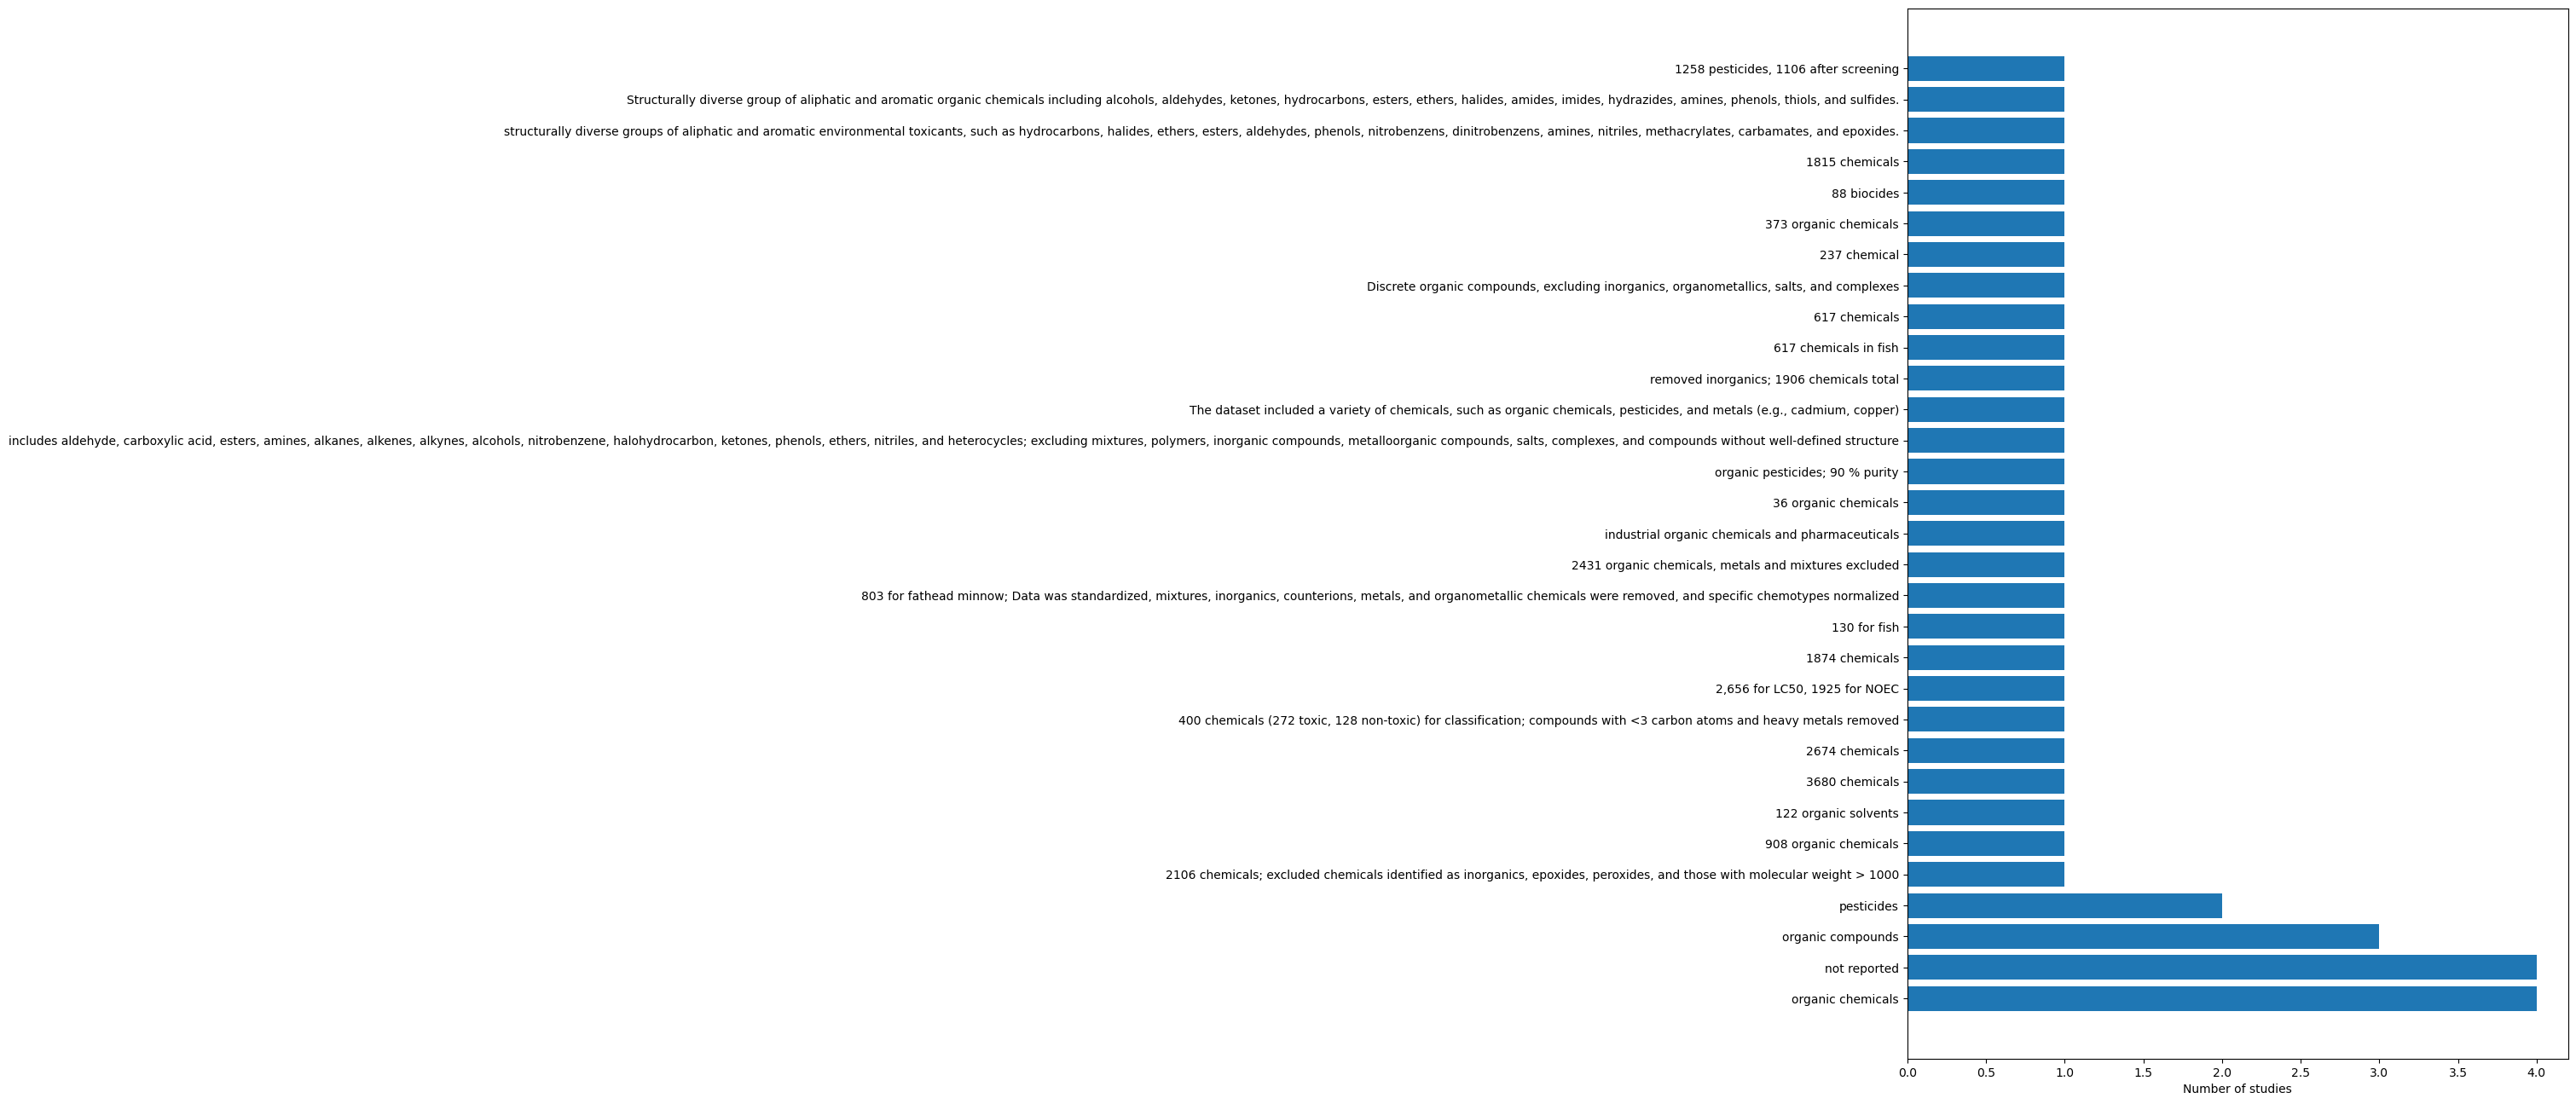

In [82]:
# Create histogram of the chemical spaces
   
fig, ax = plt.subplots(figsize=(10,16), nrows=1, ncols=1)

ax.barh(df['dataset_chemical_space'].value_counts().index,df['dataset_chemical_space'].value_counts().to_numpy())
plt.xlabel('Number of studies')

plt.show()




### Plot taxonomic space

This data needs to be coarsened into categories

) missing from current font.ython3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


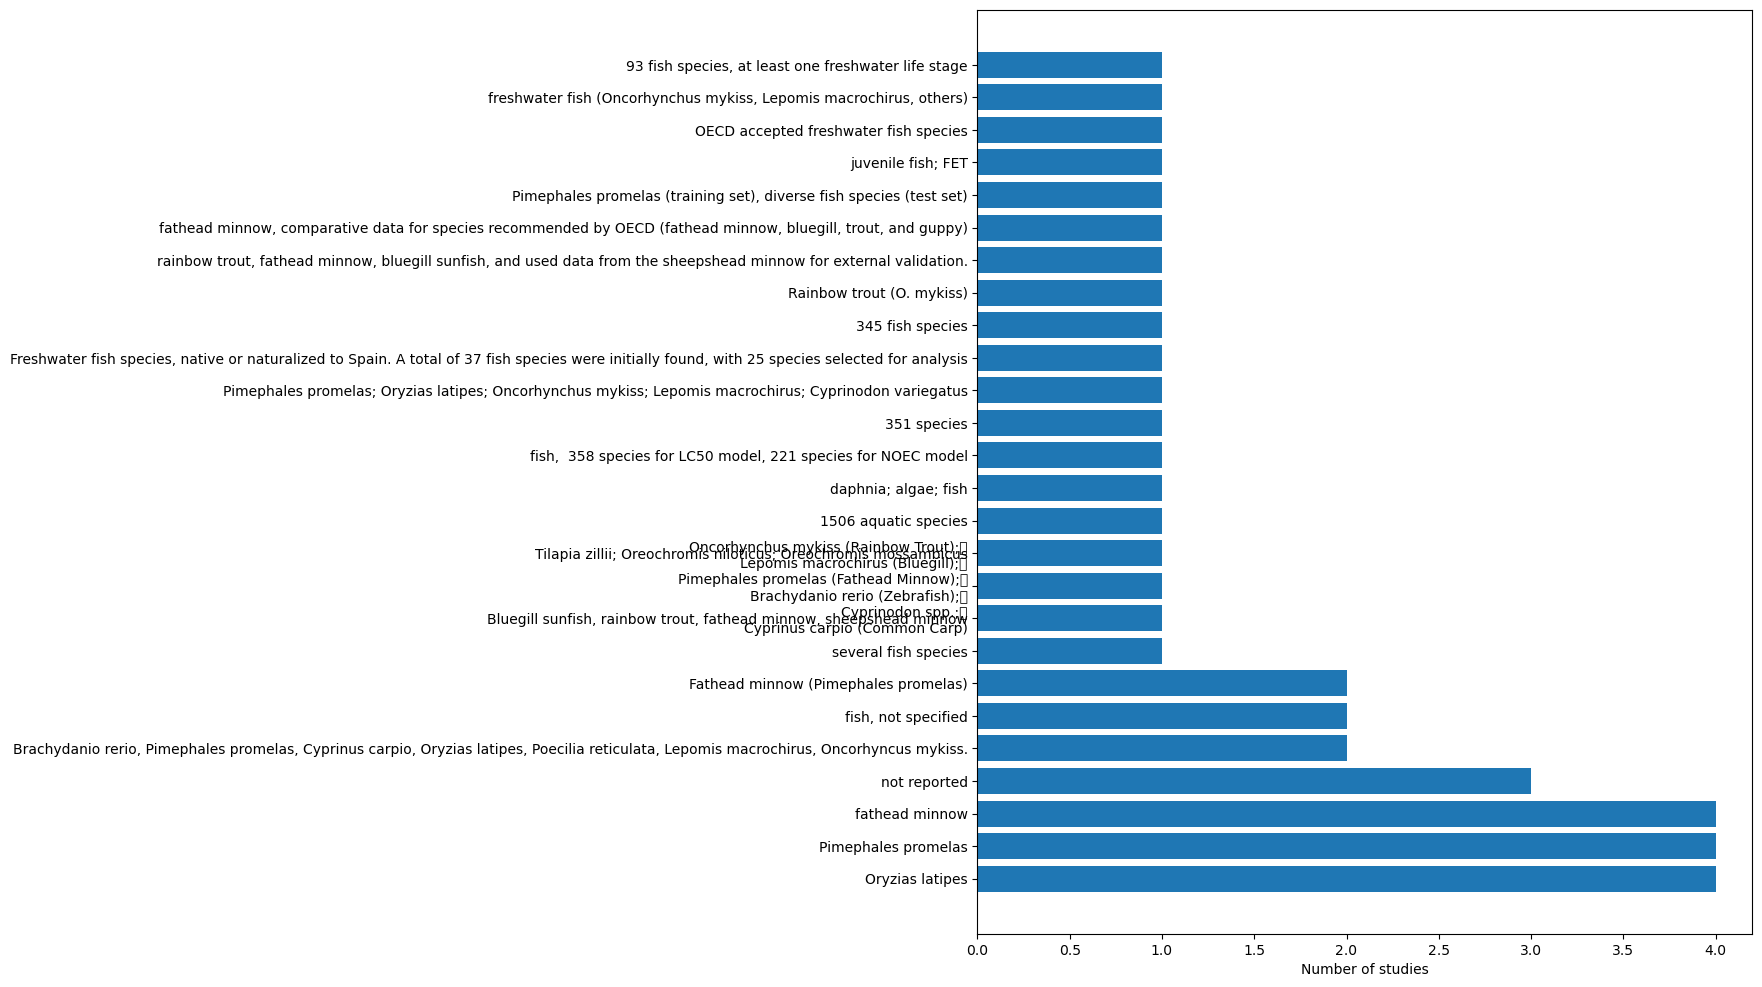

In [83]:
# Create histogram of the taxonomic spaces
   
fig, ax = plt.subplots(figsize=(10,12), nrows=1, ncols=1)
ax.barh(df[     'dataset_tax_space'].value_counts().index,      df['dataset_tax_space'].value_counts().to_numpy())
plt.xlabel('Number of studies')

plt.show()



### Plot experiment space

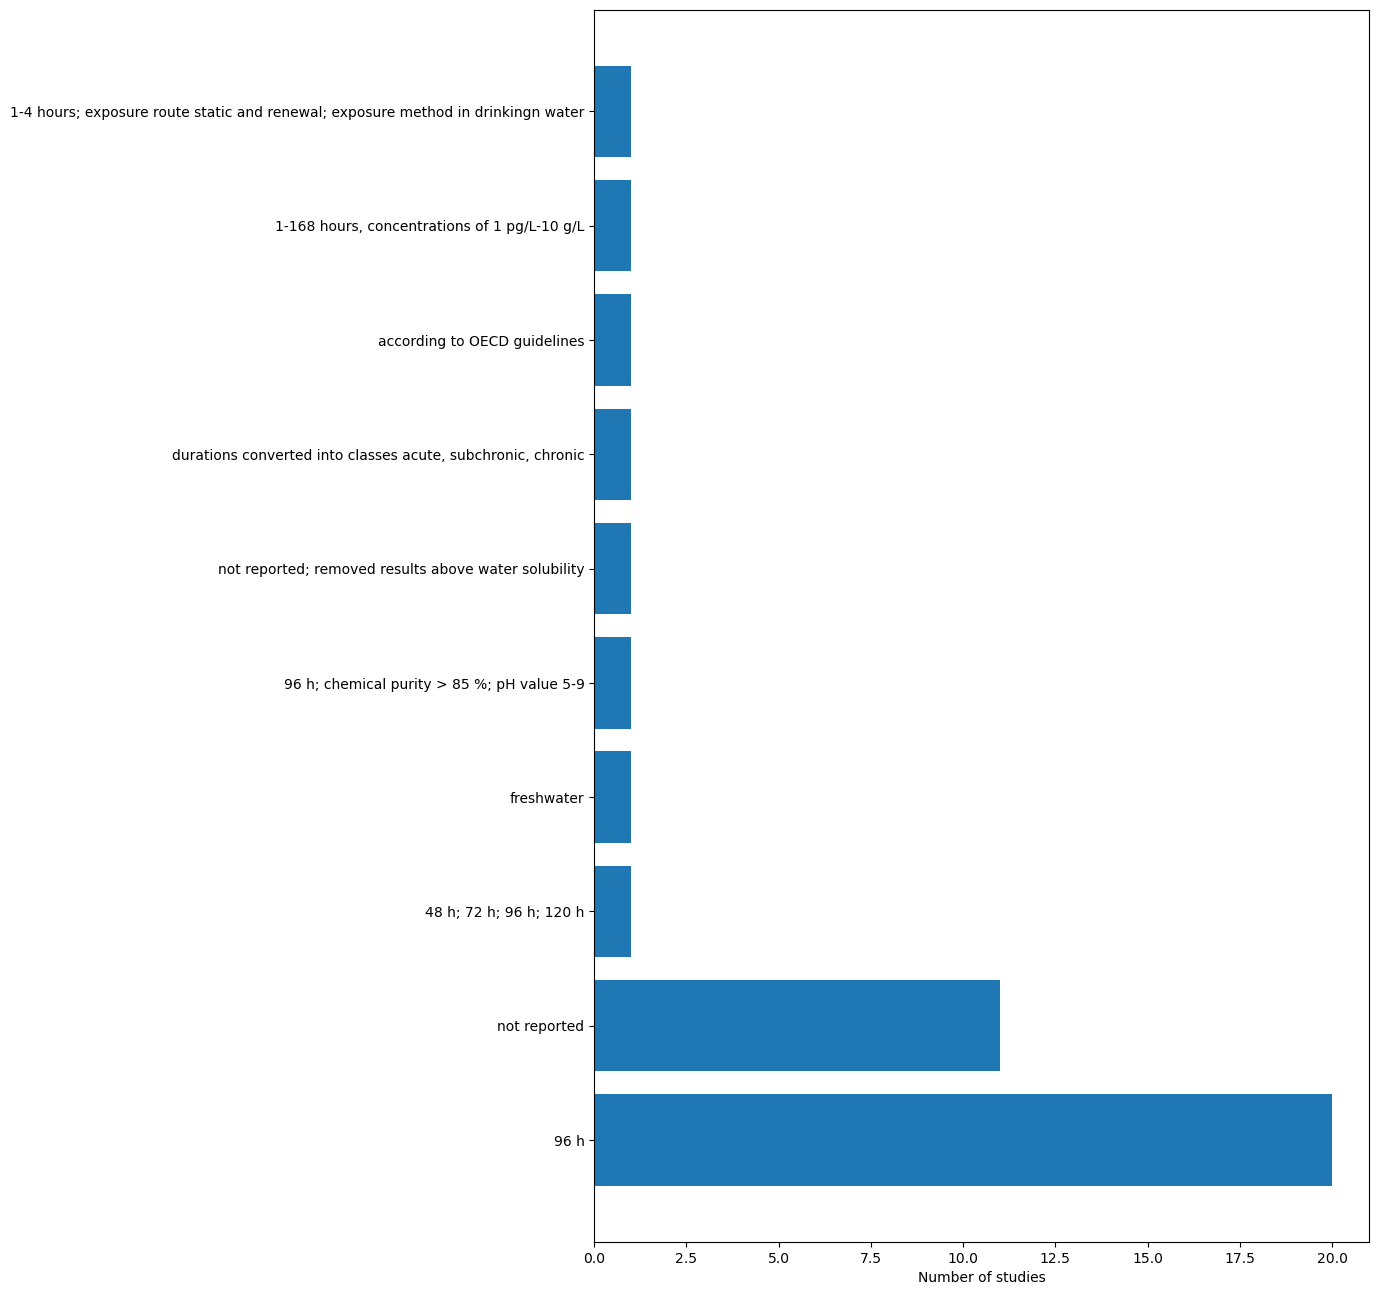

In [84]:
# Create histogram of the taxonomic spaces
   
fig, ax = plt.subplots(figsize=(10,16), nrows=1, ncols=1)

ax.barh(df['dataset_expspace'].value_counts().index, df['dataset_expspace'].value_counts().to_numpy())
plt.xlabel('Number of studies')

plt.show()

## Task


In [85]:
task_cols = ['modeling_task', 'effect_type', 'effect_endpoint']

### Modeling task

In [86]:
# translate entries separated by semicolons, into lists
for i in range(len(df)):
    if isinstance(df.modeling_task[i], str):    
        raw_entry = [df.modeling_task[i]]
        new_entry = re.split('; |, |;', raw_entry[0])
        df.at[i, 'modeling_task'] = new_entry.copy()


# remove duplicated entries
for row in df.index:
    # ds=list(set(ds))
    df.at[row,'modeling_task']=list(set(df.modeling_task.iloc[row]))


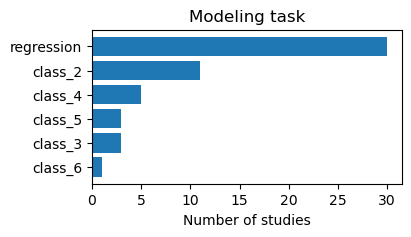

In [87]:
def plot_modeling_task(df):

    flattened_tasks = sum(df.modeling_task.values,[])
    unique_tasks = np.unique(flattened_tasks)
    
    
    # Create histogram of the datasets
    histo_tasks = np.ndarray(len(unique_tasks))
    
    for ids,ds in enumerate(unique_tasks):
        histo_tasks[ids]=flattened_tasks.count(ds)
    
    
    fig, ax = plt.subplots(figsize=(4,2), nrows=1, ncols=1)

    isorted=np.argsort(histo_tasks)
    
    ax.barh(unique_tasks[isorted], histo_tasks[isorted])
    plt.xlabel('Number of studies')
    plt.title('Modeling task')
    
    plt.show()

plot_modeling_task(df)

### Effect and endpoint

In [88]:
print('The dataset selects only effect=mortality and endpoint=LC50')
print('Effect:')
print(df['effect_type'].value_counts())
print('\nEndpoint:')
print(df['effect_endpoint'].value_counts())



The dataset selects only effect=mortality and endpoint=LC50
Effect:
effect_type
mortality    40
Name: count, dtype: int64

Endpoint:
effect_endpoint
LC50                                      37
LC50; NOEC                                 2
HC50 (geometric mean of EC50 and LC50)     1
Name: count, dtype: int64


## Cleaning

Needs to be coarsened in values

### Aggregation

In [89]:
cleaning_cols = ['aggregation', 'missing_values', 'missing_values_desc',
       'standardization', 'standardization_desc', 'outliers_removed',
       'outliers_desc']


In [90]:
for i,ds in enumerate(df.aggregation):
    temp=ds.replace('Averages taken for duplicates if ratio of highest to lowest values < 3:1; otherwise, record excluded.','arithmetic mean')        
    temp=temp.replace('not reported','unclear')
    temp=temp.replace('selected lowest value of multiples','minimum')
    temp=temp.replace('median of multiple values','median')
    temp=temp.replace('Calculation of median, arithmetic, and geometric means for multiple values; geometric mean chosen for normalization','geometric mean')
    temp=temp.replace('removed duplicates, removed conflicting records (same compound, different toxicity classes)','unclear')        
    temp=temp.replace('The toxicity values were divided into four categories via k-means clustering based on the toxicity levels. It involved categorization rather than the calculation of mean or medians but did classify values into distinct groups.','unclear')
    temp=temp.replace('geometric mean for chemical, species, test duration','geometric mean')
    temp=temp.replace('lowest value','minimum')
    temp=temp.replace('removal of duplicates with different biological activity','unclear')
    temp=temp.replace('averaging multiple entries for species-chemical combinations','arithmetic mean')
    temp=temp.replace('mean for multiple QSAR values','arithmetic mean')
    temp=temp.replace('where multiple values apply per chemical the most toxic data is selected','minimum') # most toxic is minimum LC50
    ds=deepcopy(temp)
    df.at[i,'aggregation']=temp

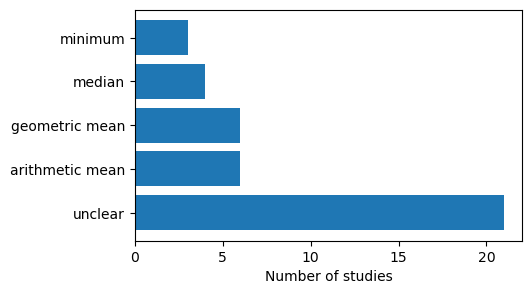

In [91]:

fig, ax = plt.subplots(figsize=(5,3), nrows=1, ncols=1)

ax.barh(df['aggregation'].value_counts().index, df['aggregation'].value_counts().to_numpy())
plt.xlabel('Number of studies')
plt.xticks([0,5,10,15,20])

plt.show()

### Missing values

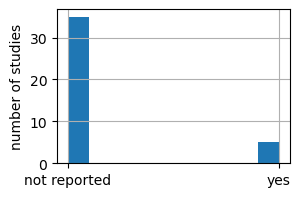

In [92]:
plt.figure(figsize=(3,2))
df.missing_values.hist()
plt.ylabel('number of studies')
plt.show()


In [93]:
print('Missing values description')
df.missing_values_desc.head(10)

Missing values description


0                                                  NaN
1                                         not reported
2                                                  NaN
3                                                  NaN
4                                                  NaN
5                                                  NaN
6                                                  NaN
7    removed entries with missing LC50; removed com...
8                                                  NaN
9                                         not reported
Name: missing_values_desc, dtype: object

### Standardization

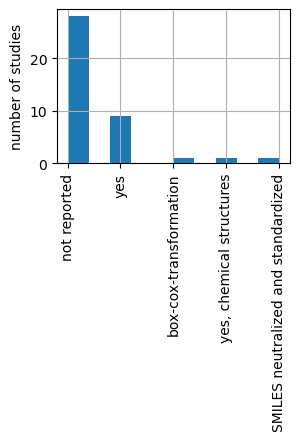

In [94]:
plt.figure(figsize=(3,2))
df.standardization.hist()
plt.ylabel('number of studies')
plt.xticks(rotation=90)
plt.show()


In [95]:
df.standardization_desc.head(10)

0                                                  NaN
1                                                  NaN
2                                                  NaN
3                                                  NaN
4                                                  NaN
5    to mol/L and as negative logarithmic concentra...
6    to mol/L and as negative logarithmic concentra...
7                                                  NaN
8                                                  NaN
9                                                  NaN
Name: standardization_desc, dtype: object

### Outliers removed

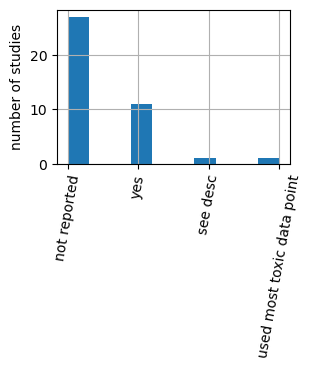

In [96]:
plt.figure(figsize=(3,2))
df.outliers_removed.hist()
plt.ylabel('number of studies')
plt.xticks(rotation=80)
plt.show()


In [97]:
df.outliers_desc.head(10)

0                                                  NaN
1    Removed values differing by a factor of over 3...
2                                                  NaN
3                                                  NaN
4                                                  NaN
5    Averages taken for duplicates if ratio of high...
6    removed maximum/minimum value ratio above 3; r...
7    The data was log-transformed prior to the calc...
8                                                  NaN
9                                                  NaN
Name: outliers_desc, dtype: object

## Splitting

In Jimeng's paper, we do random, taxonomy, and chemical splitting. But somehow taxonomy splitting is not in the database.

In [98]:
splitting_cols=['splitting', 'splitting_desc', 'splitting_exact', 'splitting_ratio']


The column splitting_exact only contains NaN values. What should that be?

In [99]:
df.splitting_exact.isnull().all()

True

### Splitting

In [100]:
# translate entries separated by semicolons, into lists
for i in range(len(df)):
    if isinstance(df.splitting[i], str):    
        raw_entry = [df.splitting[i]]
        new_entry = re.split('; |, |;', raw_entry[0])
        df.at[i, 'splitting'] = new_entry.copy()

In [101]:
for ds in df.splitting:
    for iis,individual_source in enumerate(ds):
        temp=individual_source.replace('strat_tox','stratification_tox')
        temp=temp.replace('strat_chemicals','stratification_chem')
        temp=temp.replace('species-chemical pairs','other')
        temp=temp.replace('EC50-based','stratification_tox')
        temp=temp.replace('euclidean distance','other')
        temp=temp.replace('space-filling design','other')
        temp=temp.replace('activity anc descriptors sampling','other')
        temp=temp.replace('SMOTE','other')
        ds[iis]=temp

In [102]:
def plot_splitting(df):

    flattened_splitting = sum(df.splitting,[])
    unique_splitting = np.unique(flattened_splitting)
    
    # Create histogram of the datasets
    histo_splitting = np.ndarray(len(unique_splitting))
    
    for ids,ds in enumerate(unique_splitting):
        histo_splitting[ids]=flattened_splitting.count(ds)

    fig, ax = plt.subplots(figsize=(3,2), nrows=1, ncols=1)
    
    isorted_splittings=np.argsort(histo_splitting)
    
    ax.barh(unique_splitting[isorted_splittings],histo_splitting[isorted_splittings])
    plt.xlabel('Number of studies')
    plt.xticks([0,5,10,15,20])
    plt.grid(axis='x')
    plt.show()


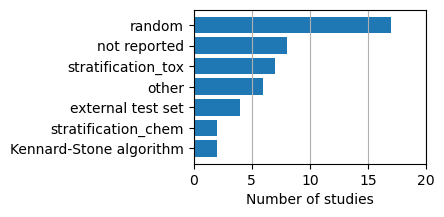

In [103]:
plot_splitting(df)

### Splitting ratio

What is a 1:1 splitting? 

What is a 25:25:25:25 splitting?

What does it mean when several splittings are reported in a single entry?

In [104]:
# translate entries separated by semicolons, into lists
for i in range(len(df)):
    if isinstance(df.splitting_ratio[i], str):    
        raw_entry = [df.splitting_ratio[i]]
        new_entry = re.split('; |, |;', raw_entry[0])
        df.at[i, 'splitting_ratio'] = new_entry.copy()


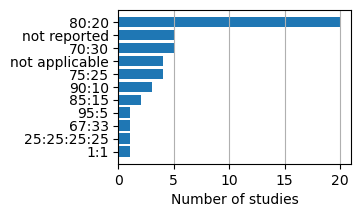

In [105]:
def plot_splitting_ratio(df):

    flattened_splitting = sum(df.splitting_ratio,[])
    unique_splitting = np.unique(flattened_splitting)
    
    # Create histogram of the datasets
    histo_splitting = np.ndarray(len(unique_splitting))
    
    for ids,ds in enumerate(unique_splitting):
        histo_splitting[ids]=flattened_splitting.count(ds)
    
    fig, ax = plt.subplots(figsize=(3,2), nrows=1, ncols=1)
    
    isorted_splittings=np.argsort(histo_splitting)
    
    ax.barh(unique_splitting[isorted_splittings],histo_splitting[isorted_splittings])
    plt.xlabel('Number of studies')
    plt.xticks([0,5,10,15,20])
    plt.grid(axis='x')
    plt.show()

plot_splitting_ratio(df)

## Metrics

In [106]:
metrics_cols=['code_reported', 'metrics_clear', 'performance_metrics','dataset_availability']

### Code reported

Needs cleaning.

What does NaN mean in this case?

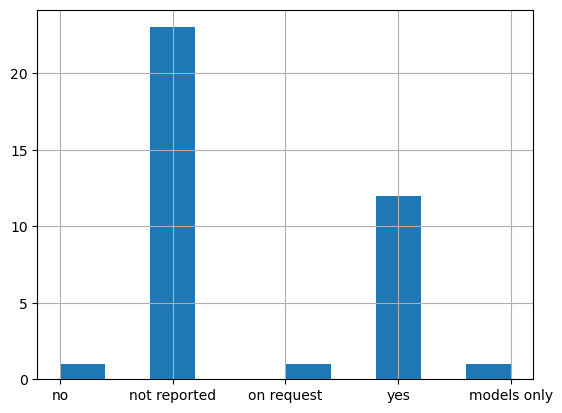

In [107]:
df.code_reported.hist().plot()
plt.show()

In [108]:
# The histogram hides the NaN values
df.code_reported.isnull().sum()

2

### Metrics Clear

Not reported should be merged with No

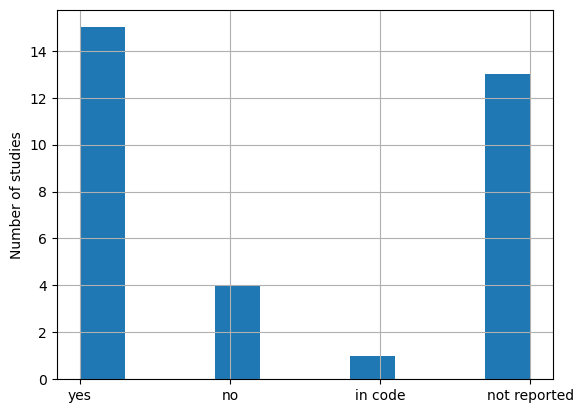

In [109]:
df.metrics_clear.hist().plot()
plt.ylabel('Number of studies')
plt.show()

In [110]:
# The histogram hides the NaN values
df.metrics_clear.isnull().sum()

7

### Performance metrics

What is RM²?

What does NaN mean here? Does it mean not available? Some kind of metric should have been provided, right?

Is root mean square error of calibration (RMSEC), the training RMSE? (in that case it's garbage, but we are not judging the quality here)

Is RMSEP the test error?

What is Q2? Sometimes they call it coefficient of determination, but then is it the R2? Maybe it is the cross-validated R2. In that case I would just count it as R2 (since we're in the benevolent setting). what do you think?

One of the entries is "R2 and root-mean-square error (RMSE)\u200b". Can you convert it into two entries, one R2, and one RMSE? Similar for "R2, R2, R2_pred (external predictive variance), and MAE", and for "R2, RMSE, Q2CV, (Q2F1, Q2F2, Q2F3), CCC, RMSEP.".

In [111]:
# translate entries separated by semicolons, into lists
for i in range(len(df)):
    if isinstance(df.performance_metrics[i], str):    
        raw_entry = [df.performance_metrics[i]]
        new_entry = re.split('; |;', raw_entry[0])
        df.at[i, 'performance_metrics'] = new_entry.copy()


In [112]:
ctemp=False
for ds in df.performance_metrics:  
    try: 
        ctemp=np.isnan(ds)
        if ctemp == True:
            # this NaN entry is ignored
            continue
        else: 
            raise RuntimeError
    except TypeError:
        pass
    
    if ctemp==False:
        for iis,individual_source in enumerate(ds):
            temp=temp.replace('Accuracy (ACC)','accuracy')
            temp=temp.replace('Accuracy','accuracy')

            temp=temp.replace('Area Under the ROC Curve (AUC)','AUC')

            temp=temp.replace('concordance correlation coefficient (CCC)','CCC')
            
            temp=temp.replace('Coverage Rate (CR)','CR')

            temp=temp.replace('F1-score','F1')
            temp=temp.replace('Macro F1','F1')
            temp=temp.replace('F1 score','F1')

            temp=temp.replace('Mean Absolute Error (MAE)','MAE')
            temp=temp.replace('MAE (mean absolute error)','MAE')
            temp=temp.replace('mean absolute error (MAE)','MAE')
            
            temp=temp.replace('Mean Squared Error (MSE)','MSE')
            temp=temp.replace('mean squared error of prediction','MSE')

            temp=temp.replace('Matthews correlation coefficient (MCC)','MCC')

            temp=temp.replace('Q^2LOO','Q2')
            temp=temp.replace('Q^2Ext','Q2')
            temp=temp.replace('Q^2','Q2')
            temp=temp.replace('Q²','Q2')
            temp=temp.replace('Determination coefficient (Q2)','Q2')
            temp=temp.replace('Q^2 (cross-validated R2)','Q2')
            temp=temp.replace('Q2ext (external predictive ability)','Q2')
            temp=temp.replace('Coefficient of determination in cross-validation (Q2cv)','Q2')
            temp=temp.replace('cross-validated R^2 (Q^2)','Q2')
            temp=temp.replace('Q^2','Q2')
            temp=temp.replace('Q² (cross-validated R2)','Q2')
            temp=temp.replace('PRESS statistic for external validation (Q2ext)','Q2')
            temp=temp.replace('leave-one-out cross-validation (Q^2)','Q2')
            temp=temp.replace('leave-one-out cross-validation (Q^2)','Q2')
            temp=temp.replace('cross-validated R2 (Q^2)','Q2')
            temp=temp.replace('cross-validation coefficient (Q2CV)','Q2CV')
            temp=temp.replace('cross-validated R2 (Q2)','Q2')
            temp=temp.replace('Q^2F1','Q2')
            
            temp=temp.replace('external validation coefficients (Q2F1, Q2F2, Q2F3)','(Q2F1, Q2F2, Q2F3)')
            
            temp=temp.replace('Precision','precision')
            temp=temp.replace('precision (PR)','precision')

            temp=individual_source.replace('R^2 (coefficient of determination)','R2')       
            temp=temp.replace('determination coefficient (R2)','R2')
            temp=temp.replace('R^2','R2')
            temp=temp.replace('R²','R2')
            temp=temp.replace('coefficient of determination (R2)','R2')
            temp=temp.replace('coefficiend of variance (R^2)','R2')
            temp=temp.replace('Determination coefficient (R^2)','R2')
            temp=temp.replace('R-squared (RSQ)','R2')            
            temp=temp.replace('Determination coefficient (r^2)','R2')
            temp=temp.replace('Determination coefficient (r2)','R2')
            temp=temp.replace('R2 (coefficient of determination)','R2')

            temp=temp.replace('percentage of variance explained (pseudo-R2)','R2')
            temp=temp.replace('Determination coefficient (R2)','R2')
            temp=temp.replace('R2 and root-mean-square error (RMSE)\u200b','R2')
            temp=temp.replace('and predictive R2 or Q²_ext','R2')
            temp=temp.replace('adjusted determination coefficient (R2a)','R2')
            temp=temp.replace('R2, R2, R2_pred (external predictive variance), and MAE','R2')
            temp=temp.replace('R2, RMSE, Q2CV, (Q2F1, Q2F2, Q2F3), CCC, RMSEP.','R2')
            temp=temp.replace('R2, RMSE, Q2CV, (Q2F1, Q2F2, Q2F3), CCC, RMSEP','R2')
            temp=temp.replace('R2,','R2')

            temp=temp.replace('r^2 (goodness-of-fit)','r2')
            temp=temp.replace('Correlation Coefficient ®','r^2')
            temp=temp.replace('r^2cv (internal predictive ability or robustness)','r^2')
            temp=temp.replace('Spearman’s correlation coefficient (Spr_m)','r2')
            temp=temp.replace('r^2','r2')

            temp=temp.replace('recall (r, often called sensitivity)','recall')
            temp=temp.replace('Recall','recall')
            temp=temp.replace('Sensitivity','recall')
            temp=temp.replace('Macro sensitivity','recall')
            temp=temp.replace('recall (RE)','recall')

            temp=temp.replace('RM^2LOO','RM2')
            temp=temp.replace('RM²LOO','RM2')            

            temp=temp.replace('Root Mean Square Error (RMSE)','RMSE')
            temp=temp.replace('Root Mean Squared Error (RMSE)','RMSE')
            temp=temp.replace('root mean squared error (RMSE)','RMSE')
            temp=temp.replace('and RMSE (root mean square error)','RMSE')
            temp=temp.replace('root mean square error of calibration (RMSEC)','RMSEC')
            temp=temp.replace('and root mean square error of prediction (RMSEP).','RMSEP')

            temp=temp.replace('Specificity','specificity')
            temp=temp.replace('Macro Specificity','specificity')

            temp=temp.replace('Standard Error of Prediction (SEP)','SEP')
            temp=temp.replace('SE (standard error of prediction)','SEP')

            
            ds[iis]=temp
    else:
        ctemp=False

In [113]:
df.performance_metrics

0             [accuracy, sensitivity, specificity, AUC]
1                                                  [R2]
2                               [R2, Q^2Ext, MAE, RMSE]
3     [R2 RMSEC, cross-validation coefficient (Q2CV)...
4                                                   NaN
5                         [R², Q²LOO, RM²LOO, MAE, CCC]
6     [R2 Q² (cross-validated R2), R2_pred (external...
7     [AUC, F1, Precision, recall, Accuracy, specifi...
8                       [recall, specificity, accuracy]
9     [accuracy, sensitivity, specificity, AUC, Macr...
10    [accuracy, predictive power, coefficiend of va...
11                                           [accuracy]
12                                           [accuracy]
13    [sensitivity, specificity, accuracy, Mean Squa...
14    [sensitivity, specificity, accuracy, RMSE, Mea...
15       [recall, specificity, predictive accuracy (Q)]
16                [R2, Mean Absolute Error (MAE), RMSE]
17                                       [R2, Q²

In [114]:
flattened_metrics = sum(df.performance_metrics.dropna(),[])
unique_metrics = np.unique(flattened_metrics)

# Create histogram of the datasets
histo_metrics = np.ndarray(len(unique_metrics))

for ids,ds in enumerate(unique_metrics):
    histo_metrics[ids]=flattened_metrics.count(ds)

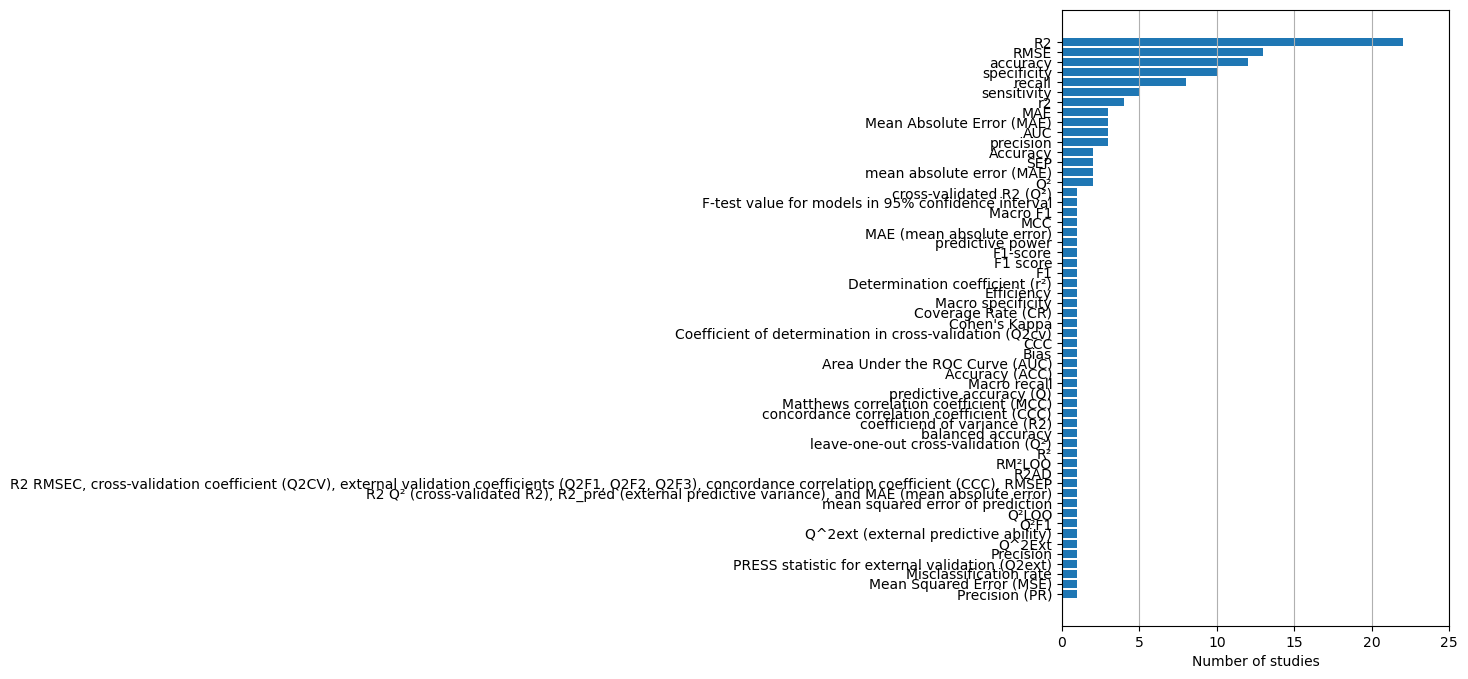

In [115]:

fig, ax = plt.subplots(figsize=(5,8), nrows=1, ncols=1)

isorted_metrics=np.argsort(histo_metrics)

ax.barh(unique_metrics[isorted_metrics],histo_metrics[isorted_metrics])
plt.xlabel('Number of studies')
plt.xticks([0,5,10,15,20,25])
plt.grid(axis='x')
plt.show()


### Dataset availability

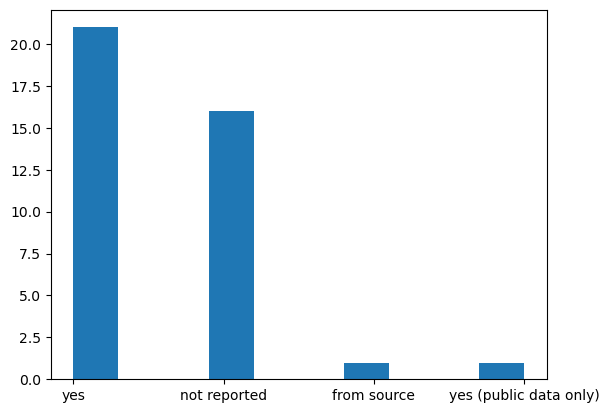

In [116]:
df.dataset_availability.hist().plot()
plt.grid(False)

# Dataset comparable?

In the following cell we take again a previous figure, where we show that only a few of the datasets are the most used:

Take the ECOTOX, Japanese Ministry of the Environment, ECHA and the Kahn 2019 datasets only. How many of those have the same chemical and taxonomic spaces?



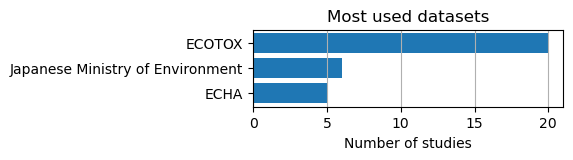

In [117]:
# Same figure, sorted by occurrence
fig, ax = plt.subplots(figsize=(4,1), nrows=1, ncols=1)
sorted_indices=np.argsort(histo_datasets)

exclude_indices=59

ax.barh(unique_datasets[sorted_indices[exclude_indices:]],histo_datasets[sorted_indices[exclude_indices:]])
plt.xticks(np.arange(0,21,5))
plt.grid(axis='x')
plt.xlabel('Number of studies')
plt.title('Most used datasets')
plt.show()

In [118]:
def filter_dataset(df, ds_name):
    ''' 
    Takes only the studies which used the ds_name dataset
    '''
    rows = [ds_name in df.dataset.values[i] for i in range(len(df))]
    df_short=deepcopy(df[rows])
    return df_short
    
df_ecotox = filter_dataset(df,'ECOTOX')
df_jme = filter_dataset(df,'Japanese Ministry of Environment')
df_echa = filter_dataset(df,'ECHA')


Is the version reported?

Version reporting already kills all the ECHA and JME studies, and 3/4 of the ECOTOX studies.

Does the version reporting make sense for ECHA and JME? Could it be that those don't need the version reporting?

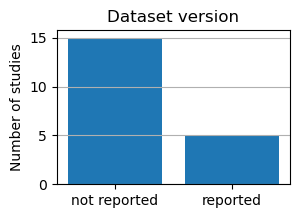

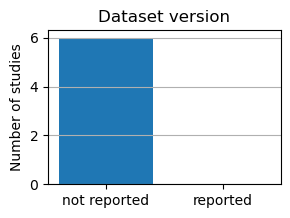

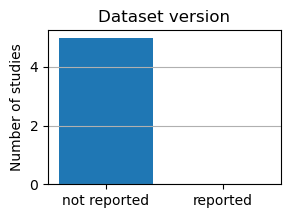

In [119]:
plot_version_reported(df_ecotox)
plot_version_reported(df_jme)
plot_version_reported(df_echa)

We should also compare the chemical, taxonomic, and experiment spaces, to see whether they coincide

## Same modeling task?


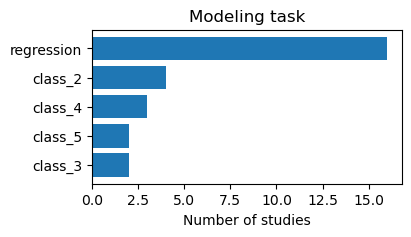

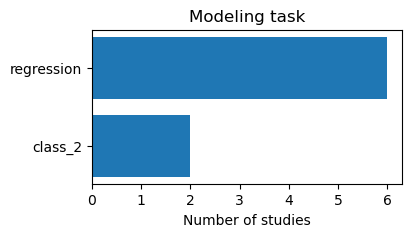

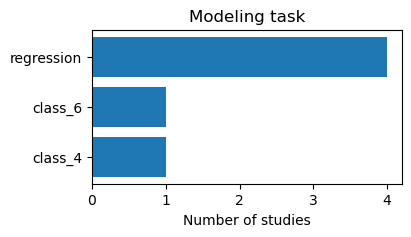

In [120]:
plot_modeling_task(df_ecotox)
plot_modeling_task(df_jme)
plot_modeling_task(df_echa)

The overwhelming majority are with regression, so let's stick to that

In [121]:
def filter_regression(my_df):
    
    keep=[]
    drop=[]
    for it,task_batch in enumerate(my_df['modeling_task']):
        if 'regression' in task_batch:
            keep.append(my_df.index[it])
        else:
            drop.append(my_df.index[it])
    return my_df.drop(drop)


df_ecotox_reg=filter_regression(df_ecotox)
df_jme_reg=filter_regression(df_jme)
df_echa_reg=filter_regression(df_echa)

## Same cleaning?

Cleaning is not reported well enough for ecotox regression

In [122]:
# These are those where the aggregation is clear
def cleaning_clear(my_df):
    df_temp = my_df[(my_df['aggregation']!='unclear') 
                   & (my_df['standardization']!='not reported')
                   & (my_df['missing_values']!='not reported')
                   & (my_df['outliers_removed']!='not reported')
                ]
    return deepcopy(df_temp)


# df_ecotox_reg[(df_ecotox_reg['aggregation']!='unclear') 
#                & (df_ecotox_reg['standardization']!='not reported')
#                & (df_ecotox_reg['missing_values']!='not reported')
#                & (df_ecotox_reg['outliers_removed']!='not reported')
#             ][cleaning_cols]
print('The following works could be comparable:')
cleaning_clear(df_ecotox_reg)[cleaning_cols]


The following works could be comparable:


,aggregation,missing_values,missing_values_desc,standardization,standardization_desc,outliers_removed,outliers_desc
7,minimum,yes,removed entries with missing LC50; removed com...,yes,NaN,yes,The data was log-transformed prior to the calc...


Cleaning is not reported well enough for jme regression

In [123]:
print('The following works could be comparable:')
cleaning_clear(df_jme_reg)[cleaning_cols]



The following works could be comparable:


,aggregation,missing_values,missing_values_desc,standardization,standardization_desc,outliers_removed,outliers_desc
7,minimum,yes,removed entries with missing LC50; removed com...,yes,NaN,yes,The data was log-transformed prior to the calc...


Cleaning is not reported well enough for ecotox regression

In [124]:
print('The following works could be comparable:')
cleaning_clear(df_echa_reg)[cleaning_cols]


The following works could be comparable:


,aggregation,missing_values,missing_values_desc,standardization,standardization_desc,outliers_removed,outliers_desc


## Same splitting?

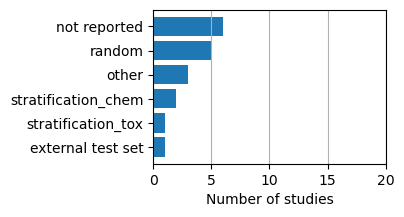

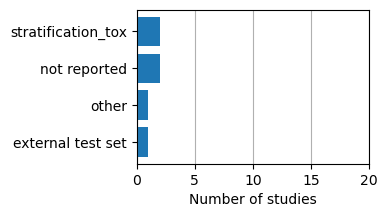

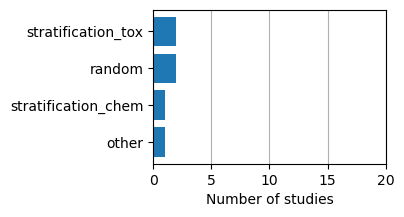

In [125]:
plot_splitting(df_ecotox_reg)
plot_splitting(df_jme_reg)
plot_splitting(df_echa_reg)

The only one that makes sense is ECOTOX with random splitting

In [126]:
df_ecotox_reg.splitting

5                   [not reported]
6                          [other]
7                   [not reported]
10             [external test set]
17                        [random]
18                  [not reported]
22                  [not reported]
25                        [random]
28            [stratification_tox]
29                  [not reported]
30                 [random, other]
31                        [random]
32           [stratification_chem]
35    [other, stratification_chem]
36                  [not reported]
37                        [random]
Name: splitting, dtype: object

In [127]:
# I select the indices manually because I'm lazy
irandom=[17,25,30,31,37]
df_ecotox_reg.loc[irandom].splitting_ratio

17                                [25:25:25:25]
25                                      [80:20]
30                        [80:20, 90:10, 75:25]
31    [95:5, 90:10, 85:15, 80:20, 75:25, 70:30]
37                                      [70:30]
Name: splitting_ratio, dtype: object

The only splitting that appears three times is 80:20, though in two of those cases, it appears within other splittings, which is strange

## Metrics comparable?

In [128]:
df_ecotox_reg[metrics_cols]

,code_reported,metrics_clear,performance_metrics,dataset_availability
5,not reported,not reported,"[R², Q²LOO, RM²LOO, MAE, CCC]",not reported
6,not reported,NaN,"[R2 Q² (cross-validated R2), R2_pred (external...",yes
7,yes,not reported,"[AUC, F1, Precision, recall, Accuracy, specifi...",yes
10,NaN,NaN,"[accuracy, predictive power, coefficiend of va...",yes
17,yes,not reported,"[R2, Q², RMSE]",not reported
18,not reported,not reported,[R2],not reported
22,yes,not reported,[R2],yes
25,not reported,yes,[Coefficient of determination in cross-validat...,yes
28,models only,no,"[Determination coefficient (r²), RMSE]",yes (public data only)
29,yes,no,"[accuracy, R2]",not reported
